In [1]:
import os
import pandas as pd
output_dir = "cont_output"
dat_train = pd.read_csv(os.path.join(output_dir, 'train_set.csv'))
dat_expl = pd.read_csv(os.path.join(output_dir, 'validation_set.csv'))

dat_train

,label,Age,Gender,Util_A,Util_B,Util_C,Util_D,Comorb_A,Comorb_B,Comorb_C,...,Comorb_E,Lab_A,Lab_B,Lab_C,Vital_A,Vital_B,Vital_C,Vital_D,Vital_E,Vital_F
0,0,86,MALE,P1,0,0.00,2.650278,0,0,0,...,0,72.0,4.1,136.0,100.0,18,99,65,126,25.7
1,0,51,MALE,P2,0,0.00,4.971111,0,0,0,...,0,67.0,5.0,122.0,73.0,17,97,46,100,24.9
2,0,23,FEMALE,P1,0,0.00,0.535278,0,0,0,...,0,1036.0,4.1,138.0,74.0,18,98,89,114,25.7
3,0,32,FEMALE,P2,0,4.13,4.400833,0,0,0,...,0,806.0,4.1,136.0,77.0,18,98,74,157,25.3
4,0,93,FEMALE,P3 and P4,0,2.94,5.539167,0,0,0,...,0,122.0,4.5,133.0,57.0,14,99,80,96,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0,47,MALE,P2,0,0.29,2.429722,0,0,0,...,0,83.0,4.2,136.0,101.0,18,98,75,144,23.9
13996,0,76,MALE,P1,0,0.00,3.205833,0,0,0,...,0,243.0,3.2,136.0,64.0,16,98,71,166,22.2
13997,0,48,FEMALE,P3 and P4,0,5.80,4.366111,0,0,0,...,0,107.0,3.6,134.0,101.0,18,100,74,195,28.3
13998,0,84,FEMALE,P1,0,5.00,2.454444,0,1,0,...,0,736.0,6.4,126.0,84.0,17,95,79,141,23.7


In [2]:
y_name = 'label'
from ShapleyVIC import model
model_object = model.models(
    x=dat_train.drop(columns=[y_name]), y=dat_train[y_name], 
    x_names_cat=['Gender', 'Util_A', 'Comorb_A', 'Comorb_B', 'Comorb_C', 'Comorb_D', 'Comorb_E'],
    outcome_type='continuous', output_dir=output_dir
)
model_object.model_optim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     68.01
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          2.38e-275
Time:                        10:28:20   Log-Likelihood:                -10811.
No. Observations:               14000   AIC:                         2.167e+04
Df Residuals:                   13978   BIC:                         2.183e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2871      0.198      1.452      0.147      -0.100       0.675
Age                  0.0036      0.000     14.695      0.000       0.003       0.004
Gender_MALE         -0.0156      0.009     -1.763      0.078      -0.033       0.002
Util_A_P2        -1.577e-05      0.012     -0.001      0.999      -0.023       0.023
Util_A_P3 and P4    -0.0007      0.014     -0.048      0.962      -0.027       0.026
Util_B               0.0372      0.002     18.094      0.000       0.033       0.041
Util_C            5.271e-05      0.001      0.104      0.918      -0.001       0.001
Util_D              -0.0145      0.003     -5.623      0.000      -0.020      -0.009
Comorb_A_1           0.4301      0.017     26.037      0.000       0.398       0.463
Comorb_B_1           0.0083      0.013      0.630      0.529      -0.018       0.034
Comorb_C_1           0.0354      0.028      1.254      0.210      -0.020       0.091
Comorb_D_1           0.0033      0.015      0.215      0.830      -0.027       0.033
Comorb_E_1          -0.0365      0.036     -1.013      0.311      -0.107       0.034
Lab_A             9.818e-05   2.24e-05      4.374      0.000    5.42e-05       0.000
Lab_B               -0.0040      0.006     -0.614      0.539      -0.017       0.009
Lab_C               -0.0012      0.001     -1.318      0.187      -0.003       0.001
Vital_A              0.0022      0.000      8.362      0.000       0.002       0.003
Vital_B              0.0001      0.002      0.054      0.957      -0.005       0.005
Vital_C             -0.0004      0.001     -0.270      0.787      -0.003       0.002
Vital_D           7.918e-05      0.000      0.242      0.809      -0.001       0.001
Vital_E             -0.0011      0.000     -6.467      0.000      -0.001      -0.001
Vital_F             -0.0054      0.001     -4.327      0.000      -0.008      -0.003
==============================================================================
Omnibus:                     5073.791   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15313.749
Skew:                           1.932   Prob(JB):                         0.00
Kurtosis:                       6.365   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
u1, u2 = model_object.init_hyper_params()
(u1, u2)

Nearly optimal defined based on loss.



(0.5, 77.5)

Nearly optimal defined based on loss.



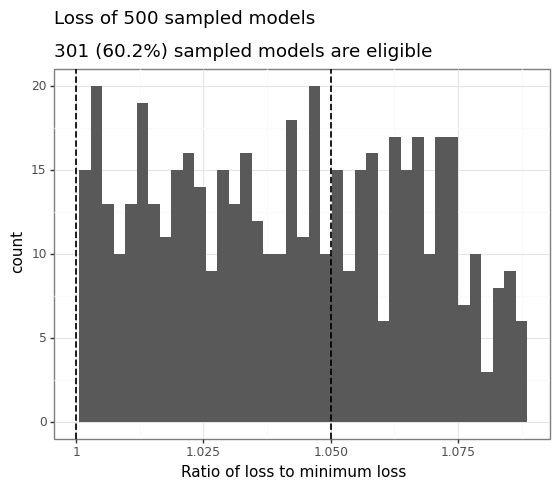

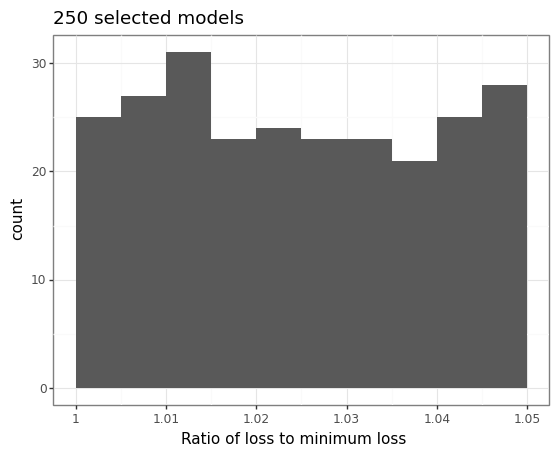

(<ggplot: (185523862562)>, <ggplot: (185523871702)>)

In [4]:
model_object.draw_models(u1=u1, u2=u2, m=500, n_final=250, random_state=1234)
model_object.models_plot

In [5]:
from ShapleyVIC import compute
m_svic = compute.compute_shapley_vic(
    model_obj=model_object, 
    x_expl=dat_expl.drop(columns=[y_name]), y_expl=dat_expl[y_name], 
    n_cores=20, # running on a Mac with 8 cores
    threshold=0.05
)

ShapleyVIC:   0%|          | 0/250 [00:00<?, ?it/s]

Using 20 cores in parallel computing.



[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed: 116.1min
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed: 946.3min

100%|██████████| 250/250 [23:42:44<00:00, 341.46s/it] 1422.7min finished


Program finished in 23.712309304611107 hours
